In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], random_state=0)

# Preprocess the text data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
temp=X_test
X_test = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)
file=open('naiveByes.sav','wb')
pickle.dump(nb,file)
file.close()


In [2]:
model=pickle.load(open('naiveByes.sav','rb'))
model.score(X_test,y_test)

0.85504

In [3]:
import pandas as pd
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

    

# Load the test data
test_df = pd.read_csv("dataset1.csv")
test_df.columns = ['review', 'sentiment']
print(test_df.head(10))

                                              review  sentiment
0  I always wrote this series off as being a comp...          0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...          0
2  This movie was so poorly written and directed ...          0
3  The most interesting thing about Miryang (Secr...          1
4  when i first read about "berlin am meer" i did...          0
5  I saw this film on September 1st, 2005 in Indi...          1
6  I saw a screening of this movie last night. I ...          0
7  William Hurt may not be an American matinee id...          1
8  IT IS A PIECE OF CRAP! not funny at all. durin...          0
9  I'M BOUT IT(1997)<br /><br />Developed & publi...          0


In [4]:
X_new=vectorizer.transform(test_df['review'])
y_new=test_df['sentiment']
y_pred=model.predict(X_new)
model.score(X_new,y_new)

0.8988

Confusion Matrix : 
[[2306  189]
 [ 317 2188]]
Confusion matrix:
[[2306  189]
 [ 317 2188]]


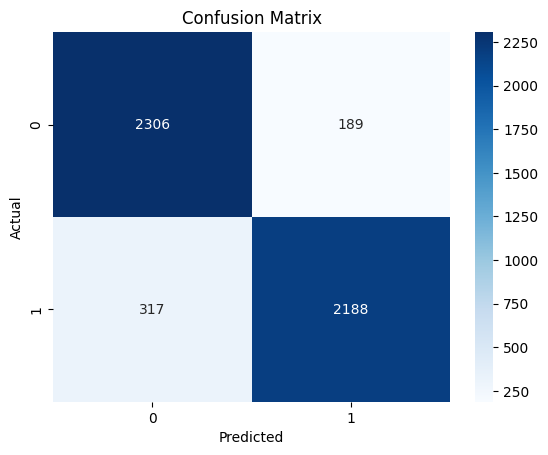

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Print the confusion matrix
print("Confusion Matrix : ")
print(metrics.confusion_matrix(test_df['sentiment'], y_pred))
cm = metrics.confusion_matrix(y_new, y_pred)
print(f'Confusion matrix:\n{cm}')

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
print(metrics.classification_report(test_df['sentiment'], y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2495
           1       0.92      0.87      0.90      2505

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000

